In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import datetime as dt
import yfinance as yf

In [15]:
# download data
stocks = ['BAJAJELEC.NS']

ohlc_mon = {}
start = dt.datetime.today() - dt.timedelta(3650)
end = dt.datetime.today()
for ticker in stocks:
    ohlc_mon[ticker] = yf.download(ticker, start=start, end= end, interval='1mo')

[*********************100%%**********************]  1 of 1 completed


In [10]:
# CAGR 
def CAGR(DF):
    df = DF.copy()
    n  = len(df)/12
    df['cum_return'] = (1+ df['mon_ret']).cumprod()
    return (df['cum_return'].tolist()[-1])**(1/n) -1

def volatility(DF):
    "function to calculate annualized volatility of a trading strategy"
    df = DF.copy()
    vol = df["mon_ret"].std() * np.sqrt(12)
    return vol

def sharpe(DF,rf):
    "function to calculate sharpe ratio ; rf is the risk free rate"
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr
    

def max_dd(DF):
    "function to calculate max drawdown"
    df = DF.copy()
    df["cum_return"] = (1 + df["mon_ret"]).cumprod()
    df["cum_roll_max"] = df["cum_return"].cummax()
    df["drawdown"] = df["cum_roll_max"] - df["cum_return"]
    df["drawdown_pct"] = df["drawdown"]/df["cum_roll_max"]
    max_dd = df["drawdown_pct"].max()
    return max_dd

In [11]:
mon_data = copy.deepcopy(ohlc_mon)

In [13]:

DF = pd.DataFrame()

DF['mon_ret'] = mon_data['BAJAJELEC.NS']['Close'].pct_change()
# DF["cum_ret"] = (1 + DF["mon_ret"]).cumprod()
CAGR(DF)*100, max_dd(DF)*100

(14.835108757148664, 58.06873663364571)

In [21]:
def calculate_drawdowns(prices):
    peaks = prices.cummax()
    drawdowns = (peaks - prices) / peaks
    return drawdowns
def max_drawdown(drawdowns):
    max_dd = drawdowns.max()
    max_dd_date = drawdowns.idxmax()
    return max_dd, max_dd_date

In [29]:
df = ohlc_mon['BAJAJELEC.NS']['Close']
df = pd.DataFrame(df)
df['Drawdowns'] = calculate_drawdowns(df)

,Close
Date,
2014-09-01,245.603989
2014-10-01,260.523865
2014-11-01,186.521317
2014-12-01,202.313416
2015-01-01,214.157501
...,...
2024-04-01,947.250000
2024-05-01,921.349976
2024-06-01,1056.650024


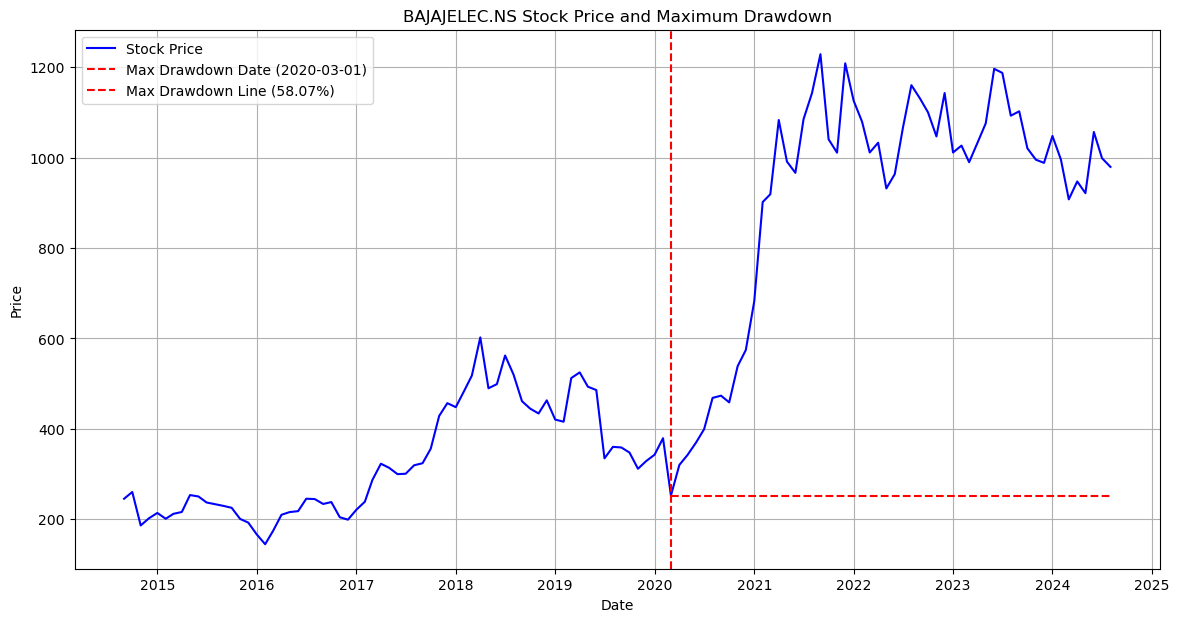

In [35]:
def calculate_drawdowns(prices):
    peaks = prices.cummax()
    drawdowns = (peaks - prices) / peaks
    return drawdowns
def max_drawdown(drawdowns):
    max_dd = drawdowns.max()
    max_dd_date = drawdowns.idxmax()
    return max_dd, max_dd_date

df = ohlc_mon['BAJAJELEC.NS']['Close']
df = pd.DataFrame(df)
df['Drawdowns'] = calculate_drawdowns(df)
max_dd, max_dd_date = max_drawdown(df['Drawdowns'])

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Stock Price', color='blue')
plt.axvline(x=max_dd_date, color='red', linestyle='--', label=f'Max Drawdown Date ({max_dd_date.date()})')

# Highlighting the drawdown line
max_dd_value = df.loc[max_dd_date, 'Close']
plt.plot([max_dd_date, df.index[-1]], [max_dd_value, max_dd_value], 'r--', label=f'Max Drawdown Line ({max_dd:.2%})')

plt.title(f'{ticker} Stock Price and Maximum Drawdown')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

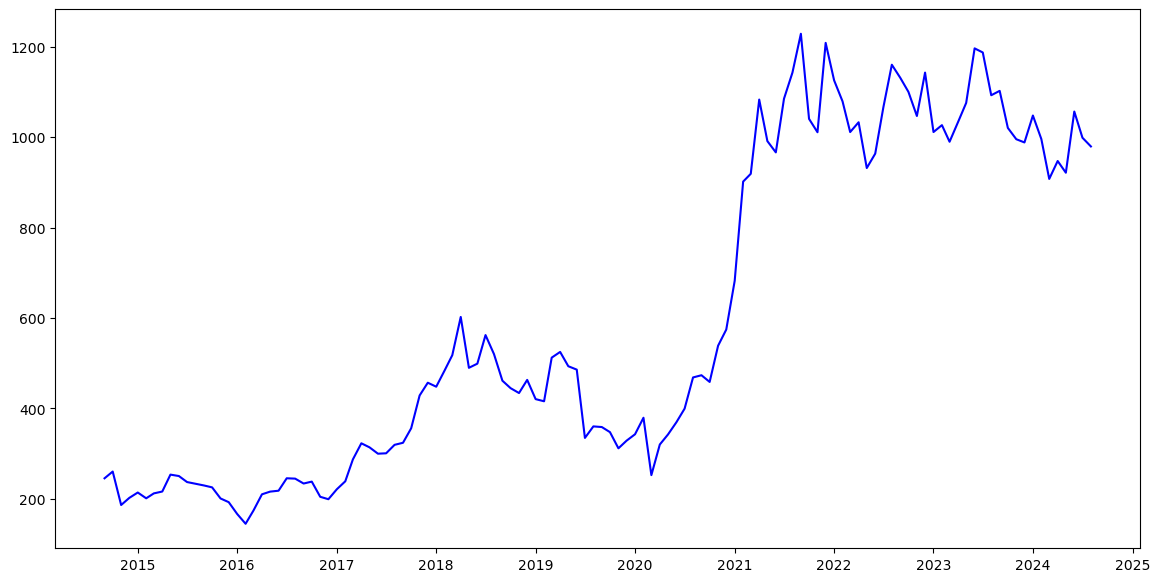

In [85]:
df = ohlc_mon['BAJAJELEC.NS']['Close']
df = pd.DataFrame(df)

def calculate_drawups(prices):
    min_prices = prices.cummin()
    drawups = (prices - min_prices) / min_prices
    return drawups
    
def max_drawup(drawups):
    max_du = drawups.max()
    max_du_date = drawups.idxmax()
    return max_du, max_du_date  
    
df['Drawups'] = calculate_drawups(df['Close'])
# Get maximum draw-up
max_du, max_du_date = max_drawup(df['Drawups'])
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Stock Price', color='blue')

# Highlighting the draw-up line
min_du_value = df.loc[:max_du_date, 'Close'].min()
plt.plot([df.loc[:max_du_date].idxmin(), max_du_date], 
         [min_du_value, df.loc[max_du_date, 'Close']], 
         'g--', label=f'Max Draw-Up Line ({max_du:.2%})')

# Adding vertical line for the max draw-up date
plt.axvline(x=max_du_date, color='orange', linestyle='--', label=f'Max Draw-Up Date ({max_du_date.date()})')

plt.title(f'{ticker} Stock Price and Maximum Draw-Up')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [79]:
df.loc[:max_du_date, 'Close'].min()

TypeError: cannot do slice indexing on DatetimeIndex with these indexers [Close     2021-09-01
Drawups   2014-10-01
dtype: datetime64[ns]] of type Series

In [82]:
max_du_date,max_du_date.values

(Close     2021-09-01
 Drawups   2014-10-01
 dtype: datetime64[ns],
 array(['2021-09-01T00:00:00.000000000', '2014-10-01T00:00:00.000000000'],
       dtype='datetime64[ns]'))

In [84]:
df.loc['2015-01-01']

Close      214.157501
Drawups      0.148166
Name: 2015-01-01 00:00:00, dtype: float64

In [73]:
df.loc[:max_du_date, 'Close'].min()

TypeError: cannot do slice indexing on DatetimeIndex with these indexers [Close     2021-09-01
Drawups   2014-10-01
dtype: datetime64[ns]] of type Series

TypeError: cannot do slice indexing on DatetimeIndex with these indexers [Close   2021-09-01
dtype: datetime64[ns]] of type Series

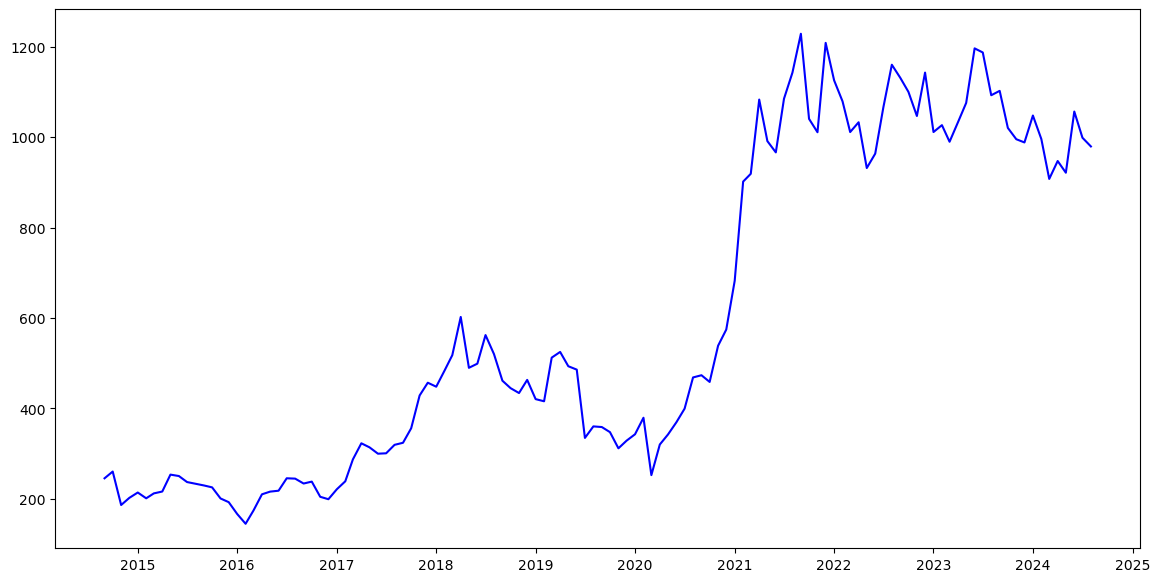

[*********************100%%**********************]  1 of 1 completed


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

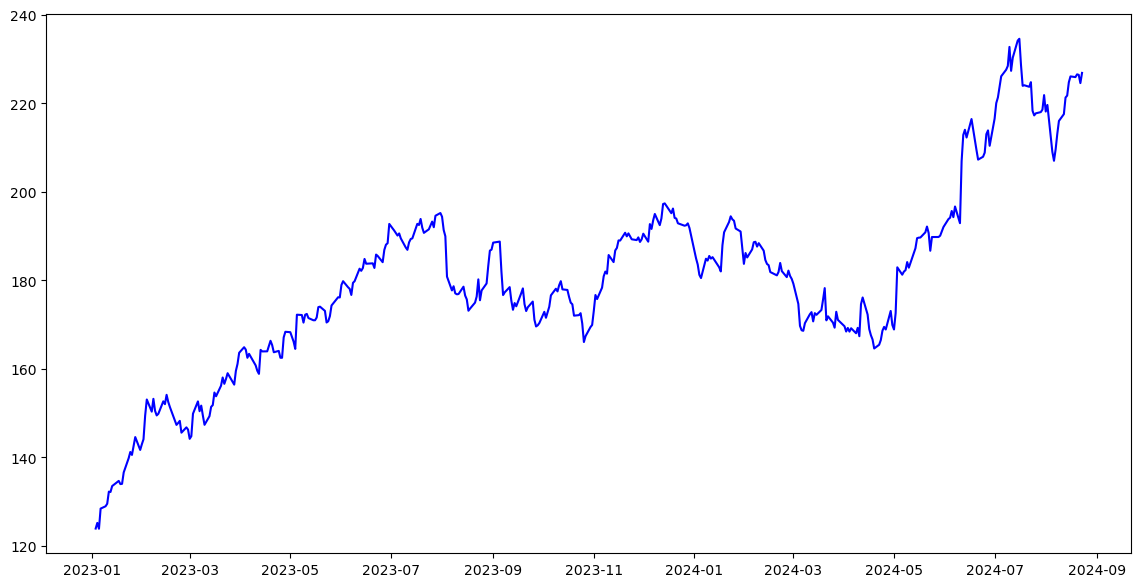

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Step 1: Fetch historical stock price data
def fetch_stock_data(ticker, start_date, end_date):
    df = yf.download(ticker, start=start_date, end=end_date)
    return df

# Step 2: Calculate the draw-ups
def calculate_drawups(prices):
    min_prices = prices.cummin()
    drawups = (prices - min_prices) / min_prices
    return drawups

# Step 3: Find the maximum draw-up and its date
def max_drawup(drawups):
    max_du = drawups.max()
    max_du_date = drawups.idxmax()
    return max_du, max_du_date

# Define stock symbol and time period
ticker = 'AAPL'  # Example: Apple Inc.
start_date = '2023-01-01'
end_date = '2024-08-24'

# Fetch stock price data
df = fetch_stock_data(ticker, start_date, end_date)
df['Drawups'] = calculate_drawups(df['Adj Close'])

# Get maximum draw-up
max_du, max_du_date = max_drawup(df['Drawups'])

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Adj Close'], label='Stock Price', color='blue')

# Highlighting the draw-up line
min_du_value = df.loc[:max_du_date, 'Adj Close'].min()
plt.plot([df.loc[:max_du_date].idxmin(), max_du_date], 
         [min_du_value, df.loc[max_du_date, 'Adj Close']], 
         'g--', label=f'Max Draw-Up Line ({max_du:.2%})')

# Adding vertical line for the max draw-up date
plt.axvline(x=max_du_date, color='orange', linestyle='--', label=f'Max Draw-Up Date ({max_du_date.date()})')

plt.title(f'{ticker} Stock Price and Maximum Draw-Up')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [46]:
df = ohlc_mon['BAJAJELEC.NS']['Close']
df = pd.DataFrame(df)

In [48]:
df

,Close
Date,
2014-09-01,245.603989
2014-10-01,260.523865
2014-11-01,186.521317
2014-12-01,202.313416
2015-01-01,214.157501
...,...
2024-04-01,947.250000
2024-05-01,921.349976
2024-06-01,1056.650024


In [50]:
df.cummax()

,Close
Date,
2014-09-01,245.603989
2014-10-01,260.523865
2014-11-01,260.523865
2014-12-01,260.523865
2015-01-01,260.523865
...,...
2024-04-01,1228.615845
2024-05-01,1228.615845
2024-06-01,1228.615845


In [40]:
def max_drawdown(drawdowns):
    max_dd = drawdowns.min()
    max_dd_date = drawdowns.idxmin()
    return max_dd, max_dd_date

In [41]:
max_drawdown(calculate_drawdowns(df))

(Close   -7.471979
 dtype: float64,
 Close   2021-09-01
 dtype: datetime64[ns])